In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [3]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [4]:
learn.freeze()

SuggestedLRs(slide=0.0006918309954926372, valley=0.0005754399462603033)

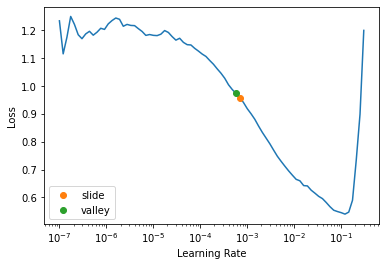

In [5]:
learn.lr_find(suggest_funcs=(slide, valley))

In [6]:
learn.fit_one_cycle(1, lr_max=6e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.161136,0.031509,0.014885,00:48


In [7]:
learn.unfreeze()

In [11]:
learn.fit_one_cycle(3, lr_max=slice(5.8e-4,6.8e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.166027,0.167953,0.039919,00:47
1,0.105544,0.035431,0.013532,00:47
2,0.054982,0.028182,0.012179,00:46
